In [4]:
# Single variable gradient descent
import numpy as np

def function(x, derive = False):
    if derive:
        return 2*x
    return x**2

learning_rate = 0.1
weight = 3

for training_step in range(20):
    print(function(weight))
    weight = weight - learning_rate * function(weight, True)

9
5.76
3.6864
2.359296
1.5099494400000002
0.9663676416000002
0.6184752906240002
0.3958241859993601
0.25332747903959046
0.1621295865853379
0.10376293541461626
0.06640827866535441
0.042501298345826825
0.027200830941329163
0.017408531802450666
0.011141460353568427
0.007130534626283792
0.004563542160821628
0.0029206669829258416
0.0018692268690725384


<IPython.core.display.Javascript object>


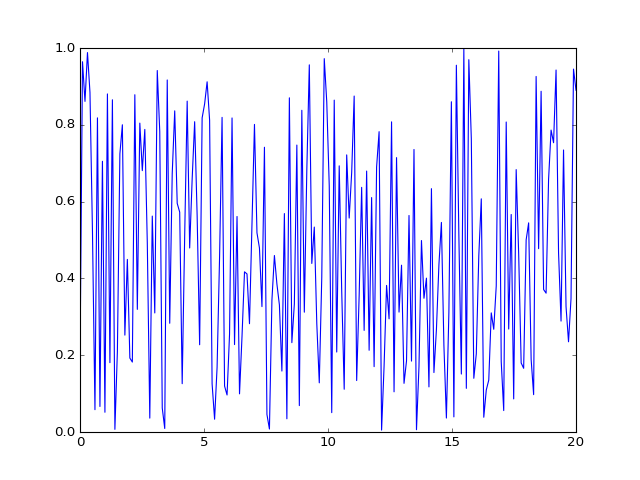

In [5]:
# Updating a plot in a loop
import matplotlib.pyplot as plt
from time import sleep
%matplotlib notebook  
# activate inline plotting in ipython notebooks

fig, ax = plt.subplots()

x = np.linspace(0, 20, 200)
for steo in range(10):
    ax.cla()
    ax.plot(x, np.random.rand(x.shape[0]))
    fig.canvas.draw()
    sleep(0.5)
    

<IPython.core.display.Javascript object>


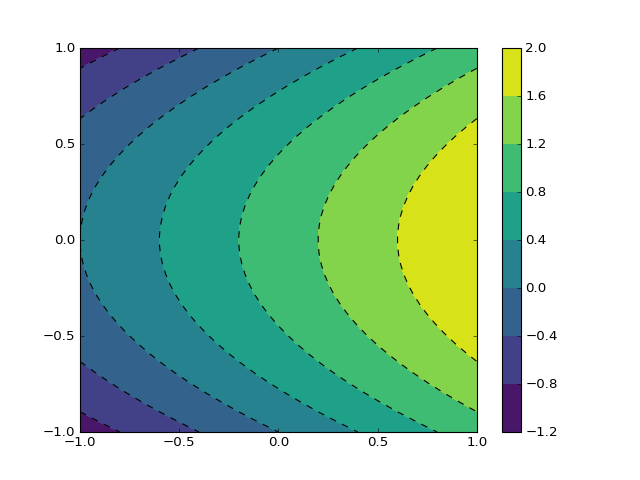

c:\users\go_fo\appdata\local\programs\python\python36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
c:\users\go_fo\appdata\local\programs\python\python36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [7]:
fig, ax = plt.subplots()
x = np.linspace(-1, 1, 40)
y = np.linspace(-1, 1, 40)
X, Y = np.meshgrid(x, y)
Z = X**1 - Y**2 + 1
# plot contour
cp = ax.contourf(X, Y, Z, cmap = "viridis")
# plot contour lines
ax.contour(X, Y, Z, colors = "black", linestyles = "dashed")
fig.colorbar(cp) # add color-bar to figure

## The backpropagation algorithm 
### 2.1.
$$y = \sigma(\sigma(\sigma(\vec{x}^T \cdot W_1) \cdot W_2) \cdot \vec{w}_3)$$
we assume that $\vec{x}$ is a column vector

### 2.2.
$$loss =\sum_i\frac{1}{2} (\hat{y}_i -\sigma(\sigma(\sigma(\vec{x}^T \cdot W_1) \cdot W_2) \cdot \vec{w}_3)_i)^2 $$

### 2.3. optional
$$ \frac{d}{dx} = \sum(\hat{y}-\sigma(\sigma(\sigma(\vec{x}^T \cdot W_1) \cdot W_2) \cdot \vec{w}_3) \cdot (\hat{y}-\sigma'(\sigma(\sigma(\vec{x}^T \cdot W_1) \cdot W_2) \cdot \vec{w}_3) \cdot \sigma(\sigma(\vec{x}^T \cdot W_1) \cdot W_2)) $$

### 2.4.
$$ \frac{d}{dx}[\frac{1}{e^{-x}+1}]$$
$$= -\frac{\frac{d}{dx}[e^{-x}+1]}{(e^{-x}+1)}$$
$$= -(1+e^{-x})^{-2} \cdot -e^x$$ 
$$= \frac{e^x}{(1+e^{-x})^2}$$

## Cats and dogs 
### 3.1. Setup

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#we can activate inline plotting with the following command
%matplotlib notebook

### 3.2. The network
### 3.3. Training data and task

<IPython.core.display.Javascript object>


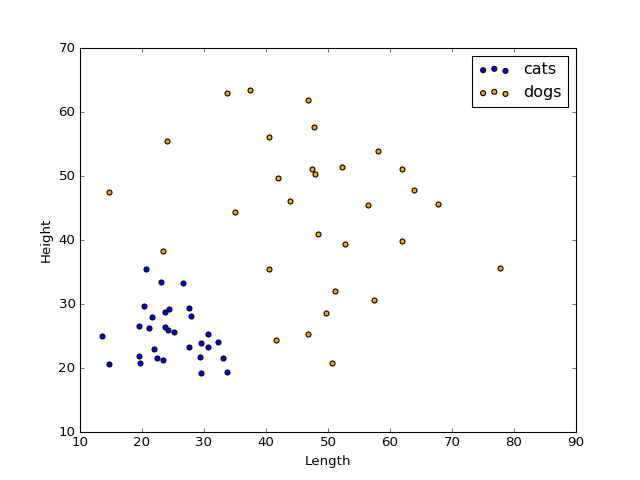

In [83]:
sample_size = 30
np.random.seed(1)

fig, ax = plt.subplots()
cats = np.random.normal(25, 5, (2, sample_size))
dogs = np.random.normal(45, 15, (2, sample_size))

# 3.4 Investigating the data
plt.scatter(cats[0],cats[1], c="blue",label="cats")
plt.scatter(dogs[0],dogs[1], c="orange", label="dogs")
plt.legend()
XLabel = ax.set_xlabel('Length')
YLabel = ax.set_ylabel('Height')

<IPython.core.display.Javascript object>


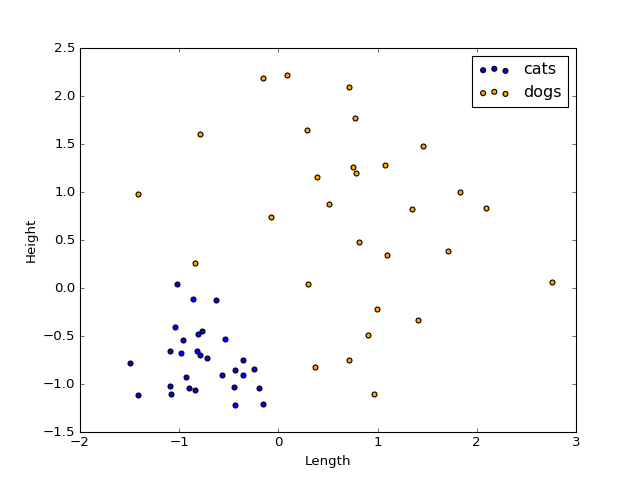

In [82]:
plt.cla()
fig, ax = plt.subplots()
pets = np.concatenate((cats,dogs), axis=1)
# print(pets.shape)
# print(pets[0])
mean_length = np.mean(pets[0])
mean_height = np.mean(pets[1])
std_length = np.std(pets[0])
std_height = np.std(pets[1])

norm_pets_length = (pets[0]-np.transpose(np.repeat(mean_length, sample_size*2)))/np.transpose(np.repeat(std_length, sample_size*2))
norm_pets_height = (pets[1]-np.transpose(np.repeat(mean_height, sample_size*2)))/np.transpose(np.repeat(std_height, sample_size*2))

norm_pets = np.transpose(np.concatenate((np.expand_dims(norm_pets_length,1), np.expand_dims(norm_pets_height,1)), axis=1))

plt.scatter(norm_pets[0][0:29], norm_pets[1][0:29], c="blue",label="cats")
plt.scatter(norm_pets[0][30:59], norm_pets[1][30:59], c="orange", label="dogs")
plt.legend()
XLabel = ax.set_xlabel('Length')
YLabel = ax.set_ylabel('Height')

In [143]:
## 3.5. as a activation function we could think of a linear function 
## however, we prefer a step  0 if cat or 1 if dog. We will label our data respectively
label_cats = np.repeat(0, sample_size)
label_dogs = np.repeat(1, sample_size)
labels = np.concatenate((label_cats,label_dogs))

our_pets = np.transpose(np.concatenate((norm_pets, np.expand_dims(labels,0))))

our_pets = np.random.permutation(our_pets)

pets, targets = np.array_split(our_pets,2,axis=1)

In [140]:
## 3.6. Forward Propagation
w = np.array([-2.5, -2.5])
# print(w.shape)
# print(pets.shape[1] == w.shape[0])

def prop(batch, weights):
    try:
        pet.shape[1] == weights.shape[0]
        prediction = np.array()
        for pet in pets:
            if pet*weights > 0:
                prediction = np.append(prediction, 1)
            else:
                prediction = np.append(prediction, 0)         
        return prediction
    except ValueError:
            print("Your samples need to be of shape (None,2) but the are", batch.shape)
    

In [ ]:
## 3.7 Loss

def loss(prediction, targets, fun="SumSquaredError"):
    error = 0
    try:
        prediction.shape == targets.shape
        for j in range(0,len(targets)): 
            error = np.append(error, 0.5 * (targets[j] - prediction[j])^2)
        return error
    try:
        prediction = np.transpose(prediction)
        prediction.shape == targets.shape
        for j in range(0,len(targets)): 
            error = np.append(error, 0.5 * (targets[j] - prediction[j])^2)
        return error
    except ValueError:
        print("targets and predictions don't have compatible shape")

In [144]:
## 3.8.  we used a step function which we found out is not applicable for 
#        updating weights. Next time we would use a sigmoid function which 
#        behaves pretty similar to a step function and which derivative is 
#        useful for weight updates. This homework we didn't have enough time to 
#        change that.

def gradient(prediction, targets):
    grad = 0
    for j in range(0,len(targets)):
        grad =   np.append(targets[j] - prediction[j])